In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
train2_tsv = 'train2.tsv'
train2_csv = pd.read_table(train2_tsv,sep = '\t')
train2_csv.to_csv('train2.csv',index = True)

In [3]:
train = pd.read_csv('train2.csv')
train_dict = {'ID':train['0'],'train_statement':train['Says the Annies List political group supports third-trimester abortions on demand.'],
          'Justification':train["That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."],
          'train_label':train['false']}
train_df = pd.DataFrame(train_dict)

In [4]:
train_df.count()

ID                 10239
train_statement    10239
Justification      10155
train_label        10239
dtype: int64

In [5]:
test2_tsv = 'test2.tsv'
test2_csv = pd.read_table(test2_tsv,sep = '\t')
test2_csv.to_csv('test2.csv',index = False)

In [6]:
test = pd.read_csv('test2.csv')
test_dict = {'ID':test['0'],'test_statement':test['Building a wall on the U.S.-Mexico border will take literally years.'],
          'Justification':test['Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U. S. -Mexico border.'],
          'test_label':test['true']}
test_df = pd.DataFrame(test_dict)

In [7]:

count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(train_df['train_statement'])
count_test = count_vectorizer.transform(test_df['test_statement'])

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(train_df['train_statement'])
tfidf_test = tfidf_vectorizer.transform(test_df['test_statement'])
print(tfidf_vectorizer.get_feature_names()[:10])
print(tfidf_train.A[:5])

['00', '000', '000new', '014', '02', '024', '029', '033', '036', '04']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
tfidf_train.shape

(10239, 11914)

In [10]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
print(count_df.head())
print(tfidf_df.head())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)
print(count_df.equals(tfidf_df))

   00  000  000new  014  02  024  029  033  036  04     ...       zip  zippo  \
0   0    0       0    0   0    0    0    0    0   0     ...         0      0   
1   0    0       0    0   0    0    0    0    0   0     ...         0      0   
2   0    0       0    0   0    0    0    0    0   0     ...         0      0   
3   0    0       0    0   0    0    0    0    0   0     ...         0      0   
4   0    0       0    0   0    0    0    0    0   0     ...         0      0   

   zombie  zombies  zone  zones  zoning  zoo  zuckerberg  zuckerbergs  
0       0        0     0      0       0    0           0            0  
1       0        0     0      0       0    0           0            0  
2       0        0     0      0       0    0           0            0  
3       0        0     0      0       0    0           0            0  
4       0        0     0      0       0    0           0            0  

[5 rows x 11914 columns]
    00  000  000new  014   02  024  029  033  036   04     ..

In [11]:
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, train_df['train_label'])

mnb_pred = nb_classifier.predict(count_test)
mnb_score = metrics.accuracy_score(test_df['test_label'], mnb_pred)

mnb_cm = metrics.confusion_matrix(test_df['test_label'], mnb_pred, labels=['true', 'false'])
print('Confusion Matrix')
print(mnb_cm)
print("accuracy:   %0.3f" % mnb_score)

Confusion Matrix
[[36 42]
 [30 64]]
accuracy:   0.237


              precision    recall  f1-score   support

 barely-true       0.23      0.18      0.20       212
       false       0.24      0.26      0.25       249
   half-true       0.24      0.32      0.28       265
 mostly-true       0.22      0.29      0.25       241
  pants-fire       0.25      0.05      0.09        92
        true       0.25      0.17      0.21       207

    accuracy                           0.24      1266
   macro avg       0.24      0.21      0.21      1266
weighted avg       0.24      0.24      0.23      1266



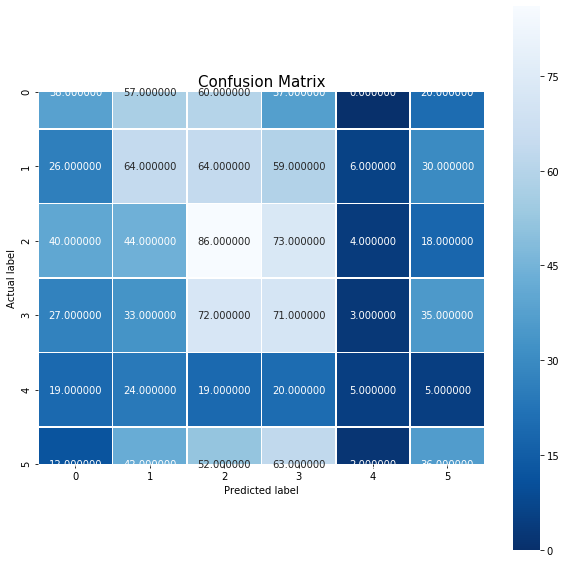

In [12]:
mnb_cm = metrics.confusion_matrix(test_df['test_label'],mnb_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(mnb_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],mnb_pred)
print(report)

In [13]:
pa_tfidf_clf = PassiveAggressiveClassifier(50)
pa_tfidf_clf.fit(count_train, train_df['train_label'])
pac_pred = pa_tfidf_clf.predict(count_test)
pac_score = metrics.accuracy_score(test_df['test_label'], pac_pred)
pac_cm = metrics.confusion_matrix(test_df['test_label'], pac_pred, labels=['true', 'false'])
print('Confusion Matrix --- PassiveAggressiveClassifier')
print(pac_cm)
print("accuracy:   %0.3f" % pac_score)

Confusion Matrix --- PassiveAggressiveClassifier
[[44 45]
 [40 77]]
accuracy:   0.221


              precision    recall  f1-score   support

 barely-true       0.18      0.16      0.17       212
       false       0.29      0.31      0.30       249
   half-true       0.24      0.22      0.23       265
 mostly-true       0.21      0.21      0.21       241
  pants-fire       0.18      0.18      0.18        92
        true       0.19      0.21      0.20       207

    accuracy                           0.22      1266
   macro avg       0.21      0.22      0.21      1266
weighted avg       0.22      0.22      0.22      1266



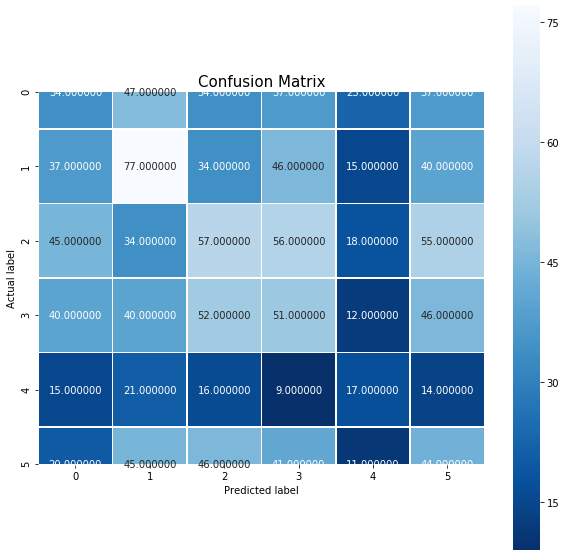

In [14]:
pac_cm = metrics.confusion_matrix(test_df['test_label'],pac_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(pac_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],pac_pred)
print(report)

In [15]:
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(count_train, train_df['train_label'])
svc_pred = svc_tfidf_clf.predict(count_test)
svc_score = metrics.accuracy_score(test_df['test_label'], svc_pred)
svc_cm = metrics.confusion_matrix(test_df['test_label'], svc_pred, labels=['true', 'false'])
print('Confusion Matrix --- LinearSVC')
print(svc_cm)
print("accuracy:   %0.3f" % svc_score)

Confusion Matrix --- LinearSVC
[[53 41]
 [39 75]]
accuracy:   0.235


              precision    recall  f1-score   support

 barely-true       0.25      0.22      0.23       212
       false       0.27      0.30      0.29       249
   half-true       0.24      0.22      0.23       265
 mostly-true       0.20      0.21      0.20       241
  pants-fire       0.16      0.15      0.15        92
        true       0.24      0.26      0.25       207

    accuracy                           0.23      1266
   macro avg       0.23      0.23      0.23      1266
weighted avg       0.23      0.23      0.23      1266



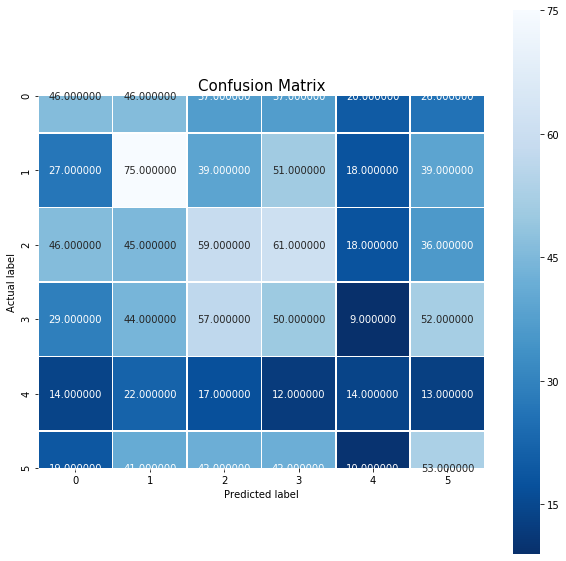

In [16]:
svc_cm = metrics.confusion_matrix(test_df['test_label'],svc_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(svc_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],svc_pred)
print(report)

In [17]:
sgd_tfidf_clf = SGDClassifier()
sgd_tfidf_clf.fit(count_train, train_df['train_label'])
sgd_pred = sgd_tfidf_clf.predict(count_test)
sgd_score = metrics.accuracy_score(test_df['test_label'], sgd_pred)
sgd_cm = metrics.confusion_matrix(test_df['test_label'], sgd_pred, labels=['true', 'false'])
print('Confusion Matrix --- SGD Classifier')
print(sgd_cm)

print("accuracy:   %0.3f" % sgd_score)

Confusion Matrix --- SGD Classifier
[[60 34]
 [33 67]]
accuracy:   0.240


              precision    recall  f1-score   support

 barely-true       0.25      0.24      0.25       212
       false       0.28      0.27      0.27       249
   half-true       0.23      0.21      0.22       265
 mostly-true       0.21      0.22      0.21       241
  pants-fire       0.18      0.20      0.19        92
        true       0.27      0.29      0.28       207

    accuracy                           0.24      1266
   macro avg       0.24      0.24      0.24      1266
weighted avg       0.24      0.24      0.24      1266



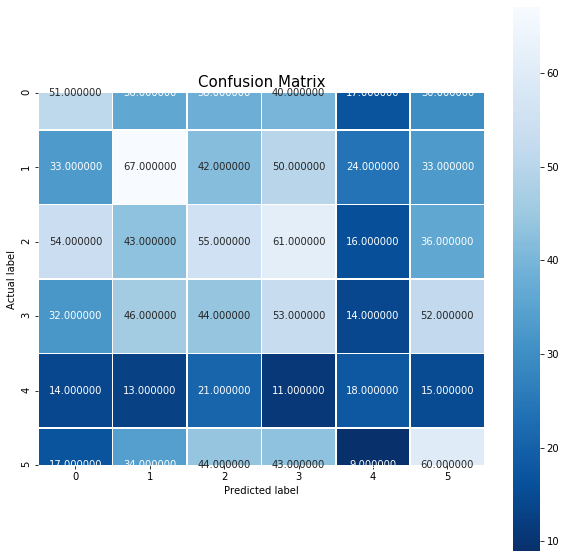

In [18]:
sgd_cm = metrics.confusion_matrix(test_df['test_label'],sgd_pred)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(sgd_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

report = classification_report(test_df['test_label'],sgd_pred)
print(report)